<a href="https://colab.research.google.com/github/nabilaam00/2025_Visi-Komputer_TI-2C/blob/main/Praktikum02_Visi_Komputer_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


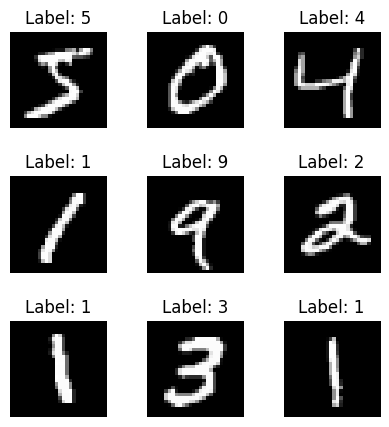

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.subplots_adjust(hspace=0.5)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

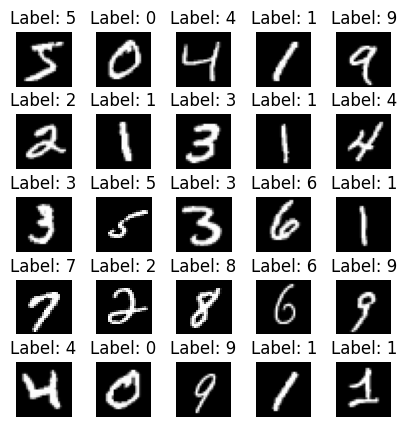

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.subplots_adjust(hspace=0.5)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

### **Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional**

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9513


### **Praktikum D3 - Membangun CNN Sederhana**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9003 - loss: 0.3483 - val_accuracy: 0.9788 - val_loss: 0.0757
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9815 - loss: 0.0614 - val_accuracy: 0.9832 - val_loss: 0.0590
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9875 - loss: 0.0394 - val_accuracy: 0.9823 - val_loss: 0.0588
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 92s 32ms/step - accuracy: 0.9918 - loss: 0.0287 - val_accuracy: 0.9860 - val_loss: 0.0475
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9885 - val_loss: 0.0549


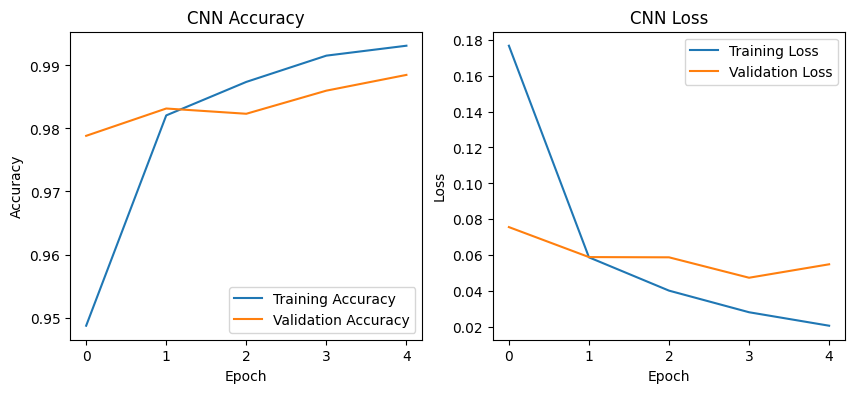

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ======= Plot History ========
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9021 - loss: 0.3141 - val_accuracy: 0.9872 - val_loss: 0.0524
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 27ms/step - accuracy: 0.9844 - loss: 0.0488 - val_accuracy: 0.9872 - val_loss: 0.0470
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9880 - val_loss: 0.0446
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 93s 33ms/step - accuracy: 0.9929 - loss: 0.0192 - val_accuracy: 0.9898 - val_loss: 0.0376
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 71s 27ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9898 - val_loss: 0.0376


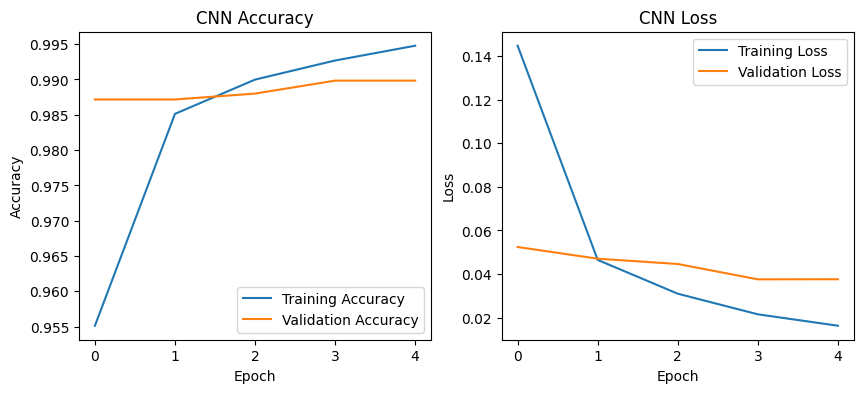

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ======= Plot History ========
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 49ms/step - accuracy: 0.3776 - loss: 1.7126 - val_accuracy: 0.5374 - val_loss: 1.2917
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.5742 - loss: 1.1980 - val_accuracy: 0.5978 - val_loss: 1.1155
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6429 - loss: 1.0227 - val_accuracy: 0.6686 - val_loss: 0.9563
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 49ms/step - accuracy: 0.6802 - loss: 0.9211 - val_accuracy: 0.6750 - val_loss: 0.9572
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 94s 67ms/step - accuracy: 0.7029 - loss: 0.8522 - val_accuracy: 0.7008 - val_loss: 0.8979
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 147s 70ms/step - accuracy: 0.7274 - loss: 0.7823 - val_accuracy: 0.6928 - val_loss: 0.8893
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 114s 51ms/step - accuracy: 0.7469 - loss: 0.7302 - val_accuracy: 0.7072 - val_loss: 0.8985
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.7611

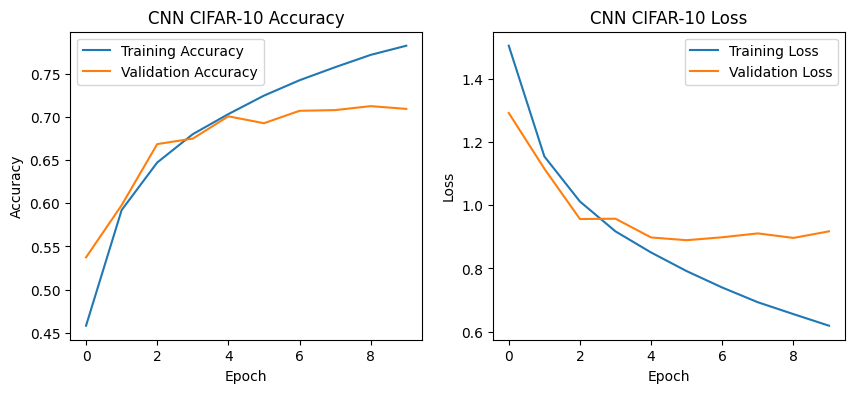

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ======= Plot history ========
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.2855 - loss: 1.9290 - val_accuracy: 0.5132 - val_loss: 1.4427
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.4470 - loss: 1.5236 - val_accuracy: 0.5748 - val_loss: 1.2462
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.4991 - loss: 1.3888 - val_accuracy: 0.6048 - val_loss: 1.1679
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.5301 - loss: 1.3012 - val_accuracy: 0.6244 - val_loss: 1.0903
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.5564 - loss: 1.2425 - val_accuracy: 0.6410 - val_loss: 1.0371
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.5720 - loss: 1.1982 - val_accuracy: 0.6432 - val_loss: 1.0303
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5848 - loss: 1.1522 - val_accuracy: 0.6606 - val_loss: 0.9937
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6059 -

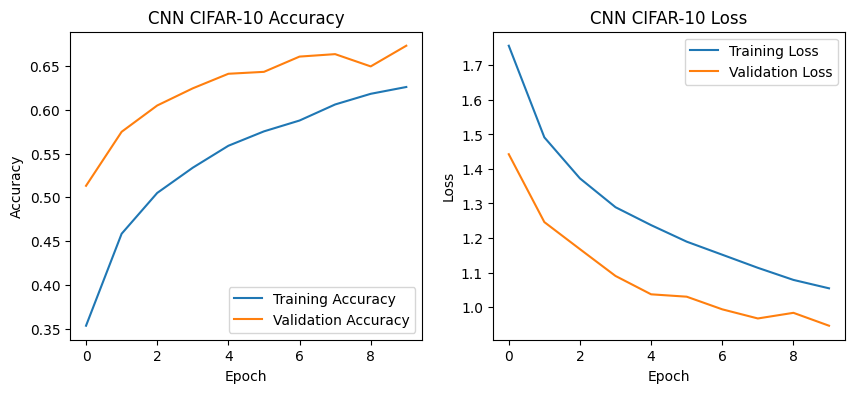

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ======= Plot history ========
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## **Praktikum D5 - Transfer Learning dengan Model Pra-Latih**

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 647s 459ms/step - accuracy: 0.4567 - loss: 1.5600 - val_accuracy: 0.5712 - val_loss: 1.2173
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 686s 461ms/step - accuracy: 0.5762 - loss: 1.2188 - val_accuracy: 0.5692 - val_loss: 1.2046
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 672s 454ms/step - accuracy: 0.6024 - loss: 1.1444 - val_accuracy: 0.6018 - val_loss: 1.1441
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 637s 453ms/step - accuracy: 0.6113 - loss: 1.1055 - val_accuracy: 0.6042 - val_loss: 1.1360
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 659s 437ms/step - accuracy: 0.6237 - loss: 1.0733 - val_accuracy: 0.6146 - val_loss: 1.1093


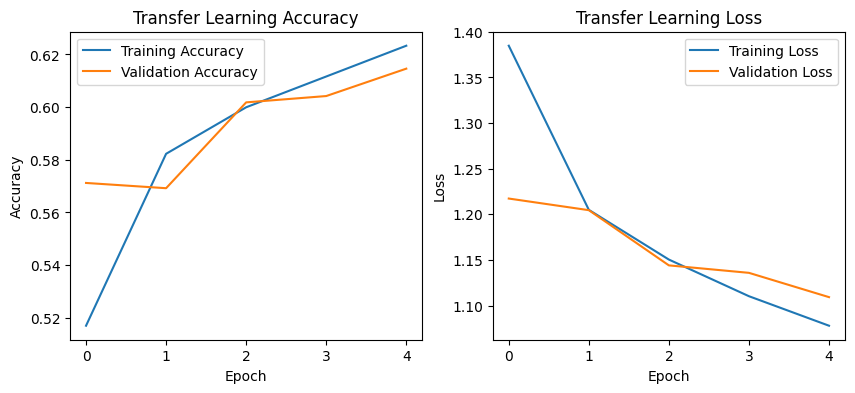

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable =False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ====== Plot History ======
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 735s 521ms/step - accuracy: 0.5100 - loss: 1.4002 - val_accuracy: 0.6178 - val_loss: 1.0815
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 711s 505ms/step - accuracy: 0.6257 - loss: 1.0639 - val_accuracy: 0.6358 - val_loss: 1.0427
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 721s 512ms/step - accuracy: 0.6580 - loss: 0.9754 - val_accuracy: 0.6436 - val_loss: 1.0188
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 739s 526ms/step - accuracy: 0.6792 - loss: 0.9204 - val_accuracy: 0.6548 - val_loss: 0.9988
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 693s 493ms/step - accuracy: 0.6914 - loss: 0.8775 - val_accuracy: 0.6646 - val_loss: 0.9753


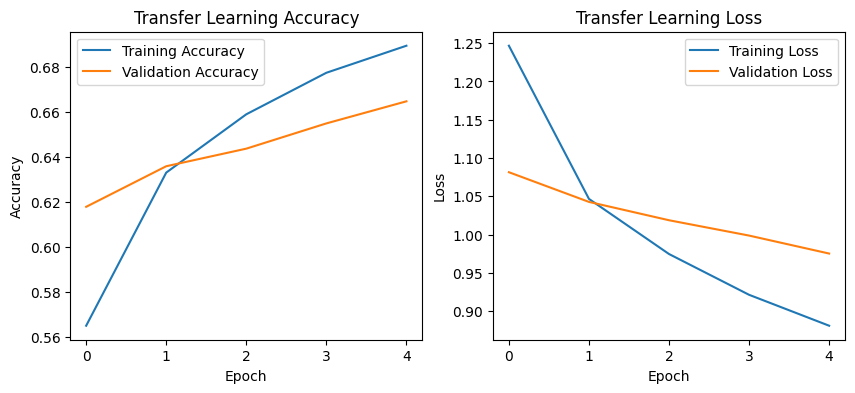

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable =True

for layer in base_model.layers[:-2]:
  layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ====== Plot History ======
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain**

313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 421ms/step
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1000
           1       0.67      0.84      0.75      1000
           2       0.80      0.39      0.53      1000
           3       0.44      0.57      0.49      1000
           4       0.56      0.64      0.60      1000
           5       0.57      0.53      0.55      1000
           6       0.67      0.69      0.68      1000
           7       0.66      0.72      0.69      1000
           8       0.77      0.81      0.79      1000
           9       0.74      0.69      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



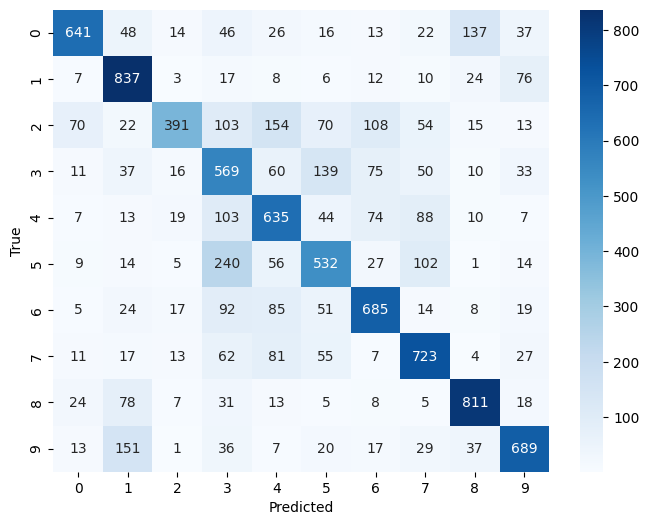

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **TUGAS**

## **Upload & Pre-process**

In [13]:
# ======= 1) Upload file foto tulisan angka ========
from google.colab import files
uploaded = files.upload()

# ======= 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =======
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  -	Konversi ke grayscale
  -	Auto-contrast
  -	(Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
  -	Crop ke bounding box digit
  -	Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
  -	Normalisasi ke [0,1] dan tambah axis channel """
  # Grayscale + autocontrast
  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)

  arr = np.array(img).astype(np.uint8)

  #Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 #ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 dengan aspect ratio
  img.thumbnail((20,20), Image.Resampling.LANCZOS)
  w, h = img.size

  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28,28), color=0)
  canvas.paste(img, ((28-w)//2, (28-h)//2))

  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0

  # Tambah channel dim (28,28,1)
  arr = arr[..., None]
  return canvas, arr

Saving 9 (1).jpg to 9 (1) (1).jpg


# Prediksi dengan CNN

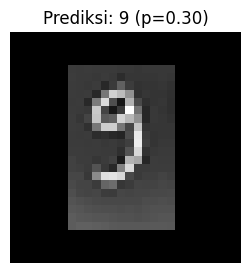

Rekap Prediksi (CNN): 
- 9 (1).jpg -> 9 (p=0.299)


In [7]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  disp, x = preprocess_to_mnist_28x28(img_pil)
  x_batch = np.expand_dims(x, axis=0)
  probs = model.predict(x_batch, verbose=0) [0]
  pred = int(np.argmax(probs))
  conf = float(np.max(probs))

  results.append((fname, pred, conf))

  # Tampilkan hasil
  plt.figure(figsize=(3,3))
  plt.imshow(disp, cmap='gray')
  plt.title(f"Prediksi: {pred} (p={conf:.2f})")
  plt.axis('off')
  plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN): ")
for r in results:
  print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

In [14]:
from sklearn.metrics import accuracy_score

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  _, x = preprocess_to_mnist_28x28(img_pil)	# x: (28,28,1) float [0,1]
  x_flat = x.reshape(1, -1)	                # (1,784)

  pred = int(clf.predict(x_flat)[0])

# SVM default tidak punya proba kecuali SVC(probability=True). Jika Anda ingin probabilitas:
# clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
  conf = None
  try:
    if hasattr(clf, "predict_proba"):
      conf = float(np.max(clf.predict_proba(x_flat)))
  except Exception:
      pass
  results.append((fname, pred, conf))

# Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))


9 (1) (1).jpg -> Prediksi SVM: 1


In [15]:
# ======= 1) Upload file foto tulisan angka ========
from google.colab import files
uploaded = files.upload()

# ======= 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =======
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  -	Konversi ke grayscale
  -	Auto-contrast
  -	(Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
  -	Crop ke bounding box digit
  -	Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
  -	Normalisasi ke [0,1] dan tambah axis channel """
  # Grayscale + autocontrast
  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)

  arr = np.array(img).astype(np.uint8)

  #Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 #ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 dengan aspect ratio
  img.thumbnail((20,20), Image.Resampling.LANCZOS)
  w, h = img.size

  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28,28), color=0)
  canvas.paste(img, ((28-w)//2, (28-h)//2))

  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0

  # Tambah channel dim (28,28,1)
  arr = arr[..., None]
  return canvas, arr

Saving 2 (1).jpg to 2 (1) (1).jpg


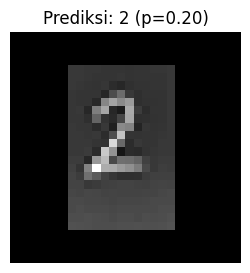

Rekap Prediksi (CNN): 
- 2 (1).jpg -> 2 (p=0.196)


In [11]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  disp, x = preprocess_to_mnist_28x28(img_pil)
  x_batch = np.expand_dims(x, axis=0)
  probs = model.predict(x_batch, verbose=0) [0]
  pred = int(np.argmax(probs))
  conf = float(np.max(probs))

  results.append((fname, pred, conf))

  # Tampilkan hasil
  plt.figure(figsize=(3,3))
  plt.imshow(disp, cmap='gray')
  plt.title(f"Prediksi: {pred} (p={conf:.2f})")
  plt.axis('off')
  plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN): ")
for r in results:
  print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

In [16]:
from sklearn.metrics import accuracy_score

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  _, x = preprocess_to_mnist_28x28(img_pil)	# x: (28,28,1) float [0,1]
  x_flat = x.reshape(1, -1)	                # (1,784)

  pred = int(clf.predict(x_flat)[0])

# SVM default tidak punya proba kecuali SVC(probability=True). Jika Anda ingin probabilitas:
# clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
  conf = None
  try:
    if hasattr(clf, "predict_proba"):
      conf = float(np.max(clf.predict_proba(x_flat)))
  except Exception:
      pass
  results.append((fname, pred, conf))

# Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))


2 (1) (1).jpg -> Prediksi SVM: 5
